In [1]:
import pypsa
import numpy as np 

In [2]:
network = pypsa.Network()

In [4]:
# add 3 buses
for i in range(3):
    network.add("Bus", "My bus {}". format(i))
print(network.buses)

attribute  v_nom type    x    y carrier  v_mag_pu_set  v_mag_pu_min  \
My bus 0     1.0       0.0  0.0      AC           1.0           0.0   
My bus 1     1.0       0.0  0.0      AC           1.0           0.0   
My bus 2     1.0       0.0  0.0      AC           1.0           0.0   

attribute  v_mag_pu_max control sub_network  
My bus 0            inf      PQ              
My bus 1            inf      PQ              
My bus 2            inf      PQ              


In [6]:
# add three lines in a ring
for i in range(3):
    network.add("Line", "My line {}". format(i),
               bus0="My bus {}".format(i),
               bus1="My bus {}".format((i+1)%3),
               x=0.0001)
print(network.lines)

attribute      bus0      bus1 type       x    r    g    b  s_nom  \
My line 0  My bus 0  My bus 1       0.0001  0.0  0.0  0.0    0.0   
My line 1  My bus 1  My bus 2       0.0001  0.0  0.0  0.0    0.0   
My line 2  My bus 2  My bus 0       0.0001  0.0  0.0  0.0    0.0   

attribute  s_nom_extendable  s_nom_min    ...      v_ang_min  v_ang_max  \
My line 0             False        0.0    ...           -inf        inf   
My line 1             False        0.0    ...           -inf        inf   
My line 2             False        0.0    ...           -inf        inf   

attribute  sub_network  x_pu  r_pu  g_pu  b_pu  x_pu_eff r_pu_eff  s_nom_opt  
My line 0                0.0   0.0   0.0   0.0       0.0      0.0        0.0  
My line 1                0.0   0.0   0.0   0.0       0.0      0.0        0.0  
My line 2                0.0   0.0   0.0   0.0       0.0      0.0        0.0  

[3 rows x 26 columns]


In [13]:
#add a generator at bus zero
network.add("Generator", "My gen",
           bus = "My bus 0",
           p_set = 100)
print(network.generators)
print(network.generators_t.p_set)

ERROR:pypsa.components:Failed to add Generator component My gen because there is already an object with this name in generators


attribute       bus control type  p_nom  p_nom_extendable  p_nom_min  \
My gen     My bus 0      PQ         0.0             False        0.0   

attribute  p_nom_max  p_min_pu  p_max_pu  p_set    ...      start_up_cost  \
My gen           inf       0.0       1.0  100.0    ...                0.0   

attribute  shut_down_cost min_up_time  min_down_time  initial_status  \
My gen                0.0           0              0               1   

attribute  ramp_limit_up  ramp_limit_down  ramp_limit_start_up  \
My gen               NaN              NaN                  1.0   

attribute  ramp_limit_shut_down  p_nom_opt  
My gen                      1.0        0.0  

[1 rows x 27 columns]
Empty DataFrame
Columns: []
Index: [now]


In [14]:
#add a load at bus 1
network.add("Load", "My load",
           bus = "My bus 1",
           p_set = 100)
print(network.loads)
print(network.loads_t.p_set)

attribute       bus type  p_set  q_set  sign
My load    My bus 1       100.0    0.0  -1.0
Empty DataFrame
Columns: []
Index: [now]


In [15]:
# Do a newton raphson power flow
network.pf()
print(network.lines_t.p0)
print(network.buses_t.v_ang*180/np.pi)

INFO:pypsa.pf:Slack bus for sub-network 0 is My bus 0
C:\Users\sunha\Anaconda3\lib\site-packages\pypsa\components.py:758: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  keys=self.passive_branch_components)
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.153168 seconds


     My line 0  My line 1  My line 2
now  66.666667 -33.333333 -33.333333
     My bus 0  My bus 1  My bus 2
now       0.0 -0.381983 -0.190989


(<matplotlib.collections.PathCollection at 0x24a74290da0>,
 <matplotlib.collections.LineCollection at 0x24a742a2400>)

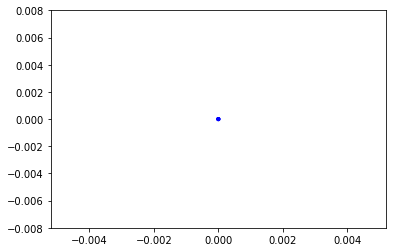

In [16]:
network.plot()